# Ensemble learning model

Ensemble learning uses multiple machine learning models to try to make better predictions on a dataset. An ensemble model works by training different models on a dataset and having each model make predictions individually. The predictions of these models are then combined in the ensemble model to make a final prediction.

Since random forest gave low accuracy, we will use KNN, SVM and logistic regression for our ensemble learning model. We expect that the model will hide the weaknesses of the models and give higher accuracy that the individual models.

We will start by evaluating each model independently and then combine the predictions using the voting classifier

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix, accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier

In [ ]:
X_train = np.loadtxt("Data_files/x_train_scaled.csv",delimiter=',')
y_train = np.loadtxt("Data_files/y_train_scaled.csv",delimiter=',', dtype=str)
X_test = np.loadtxt("Data_files/x_test_scaled.csv",delimiter=',')
y_test = np.loadtxt("Data_files/y_test_scaled.csv",delimiter=',', dtype=str)

### create new a knn model

In [ ]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 1}


### create a new support vector machine

In [ ]:
#create a new support vector machine
sv = SVC()
#create a dictionary of all values we want to test for C and kernel
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10, 100, 200]}
svm_gs = GridSearchCV(sv, parameters, cv=5)

svm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 200],
                         'kernel': ('linear', 'rbf', 'poly')})

In [ ]:
#save best model
svm_best = svm_gs.best_estimator_
#check best n_estimators value
print(svm_gs.best_params_)

{'C': 200, 'kernel': 'rbf'}


### create a new logistic regression model

In [ ]:
#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#test the three models with the test data and print their accuracy scores
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))
print('svm: {}'.format(svm_best.score(X_test, y_test)))

knn: 0.5555555555555556
log_reg: 0.5481481481481482
svm: 0.5925925925925926


### voting classifier

In [ ]:
# best_hyperparams=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg), ('svm', sv)]
best_hyperparams=[('knn', knn_best), ('svm', svm_best), ('log_reg', log_reg)]
ensemble = VotingClassifier(best_hyperparams, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6

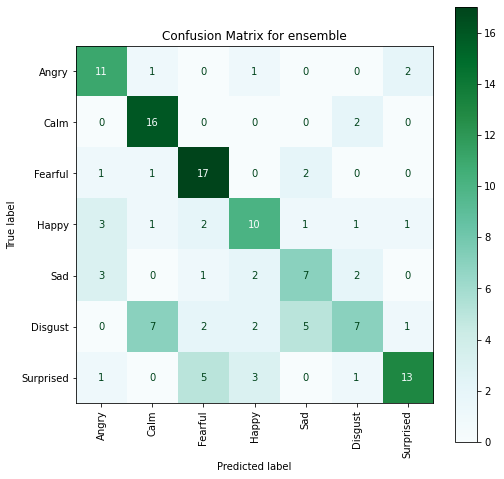

In [ ]:
# plot confusion matrix for ensemble

y_pred = ensemble.predict(X_test)
cm_ensemble = confusion_matrix(y_test, y_pred)
disp_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=['Angry', 'Calm', 'Fearful', 'Happy','Sad','Disgust','Surprised'])
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Confusion Matrix for ensemble')
disp_ensemble.plot(xticks_rotation='vertical', ax=ax, cmap='BuGn')
plt.savefig('EDA_plot/ensemble_confusion_matrix.png')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.73      0.65        15
           1       0.62      0.89      0.73        18
           2       0.63      0.81      0.71        21
           3       0.56      0.53      0.54        19
           4       0.47      0.47      0.47        15
           5       0.54      0.29      0.38        24
           6       0.76      0.57      0.65        23

    accuracy                           0.60       135
   macro avg       0.59      0.61      0.59       135
weighted avg       0.60      0.60      0.58       135



#### Observations and Conclusion

We have impemented a simple ensemble learning model that combines predictions from KNN, SVM and Logistic regression.
We observe that exhaustive search for parameters using GridSearchCV match the values we obtained when evaluating the models separately without using GridSearchCV and using the validation set. We also observe that the performance of ensemble technique is the highest compared to individual models. Our Ensemble performs just slightly better than SVM.

